id : 샘플 아이디

age : 나이

workclass : 일 유형

fnlwgt : CPS(Current Population Survey) 가중치

education : 교육수준

education.num : 교육수준 번호

marital.status : 결혼 상태

occupation : 직업

relationship : 가족관계

race : 인종

sex : 성별

capital.gain : 자본 이익

capital.loss : 자본 손실

hours.per.week : 주당 근무시간

native.country : 본 국적

target : 소득

0 = <=50K (5만 달러 이하)

1 = >50K (5만 달러 초과) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
directory='소득예측경진대회\\'
train=pd.read_csv(directory+'train.csv')
test=pd.read_csv(directory+'test.csv')

In [3]:
display(train.keys())
display(train.shape)

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'target'],
      dtype='object')

(17480, 16)

결측치 탐색

In [4]:
missing=pd.DataFrame(np.round(train.isnull().sum()/train.shape[0],2).sort_values(ascending=False),columns=['결측치 비율'])
display(missing)

,결측치 비율
occupation,0.11
workclass,0.11
native.country,0.03
target,0.00
hours.per.week,0.00
capital.loss,0.00
capital.gain,0.00
sex,0.00
race,0.00
relationship,0.00


'occupation','workclass','native.country' 변수에서 결측치가 있음이 확인되었다.

occupation        1843
workclass         1836
native.country     583
dtype: int64


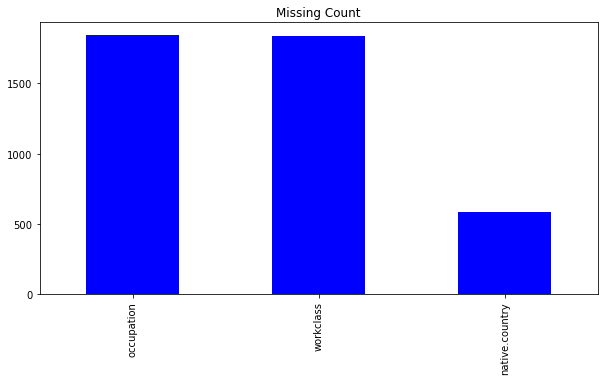

In [5]:
print(train.loc[:,['occupation','workclass','native.country']].isnull().sum())
plt.figure(figsize=(10,5))
train.loc[:,['occupation','workclass','native.country']].isnull().sum().plot.bar(color='b')
plt.title('Missing Count')
plt.rc('font',size=20)
plt.show()

In [27]:
#결측값들은 특이한 점이 보이지 않아 모두 제거하였습니다.
train=train.dropna(axis=0)
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 15080
Data columns (total 66 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        15081 non-null  int64  
 1   education                                  15081 non-null  int64  
 2   marital.status                             15081 non-null  int64  
 3   occupation                                 15081 non-null  int64  
 4   sex                                        15081 non-null  int64  
 5   hours.per.week                             15081 non-null  int64  
 6   target                                     15081 non-null  float64
 7   workclass_Federal-gov                      15081 non-null  uint8  
 8   workclass_Local-gov                        15081 non-null  uint8  
 9   workclass_Private                          15081 non-null  uint8  
 10  workclass_Self-emp-inc

None

EDA

In [7]:
display(train.describe())

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target
count,15081.00000,15081.000000,1.508100e+04,15081.000000,15081.000000,15081.000000,15081.000000,15081.000000
mean,7540.00000,38.455673,1.897891e+05,10.110802,1105.202772,85.466415,40.920828,0.250182
std,4353.65404,13.158095,1.051112e+05,2.565325,7489.760601,397.661418,12.018513,0.433132
min,0.00000,17.000000,1.882700e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3770.00000,28.000000,1.177460e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,7540.00000,37.000000,1.782510e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,11310.00000,47.000000,2.381880e+05,13.000000,0.000000,0.000000,45.000000,1.000000
max,15080.00000,90.000000,1.455435e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


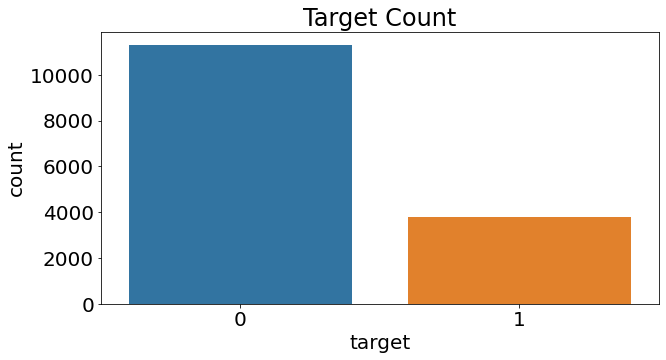

In [8]:
plt.figure(figsize=(10,5))
plt.title("Target Count")
sns.countplot(train['target'])

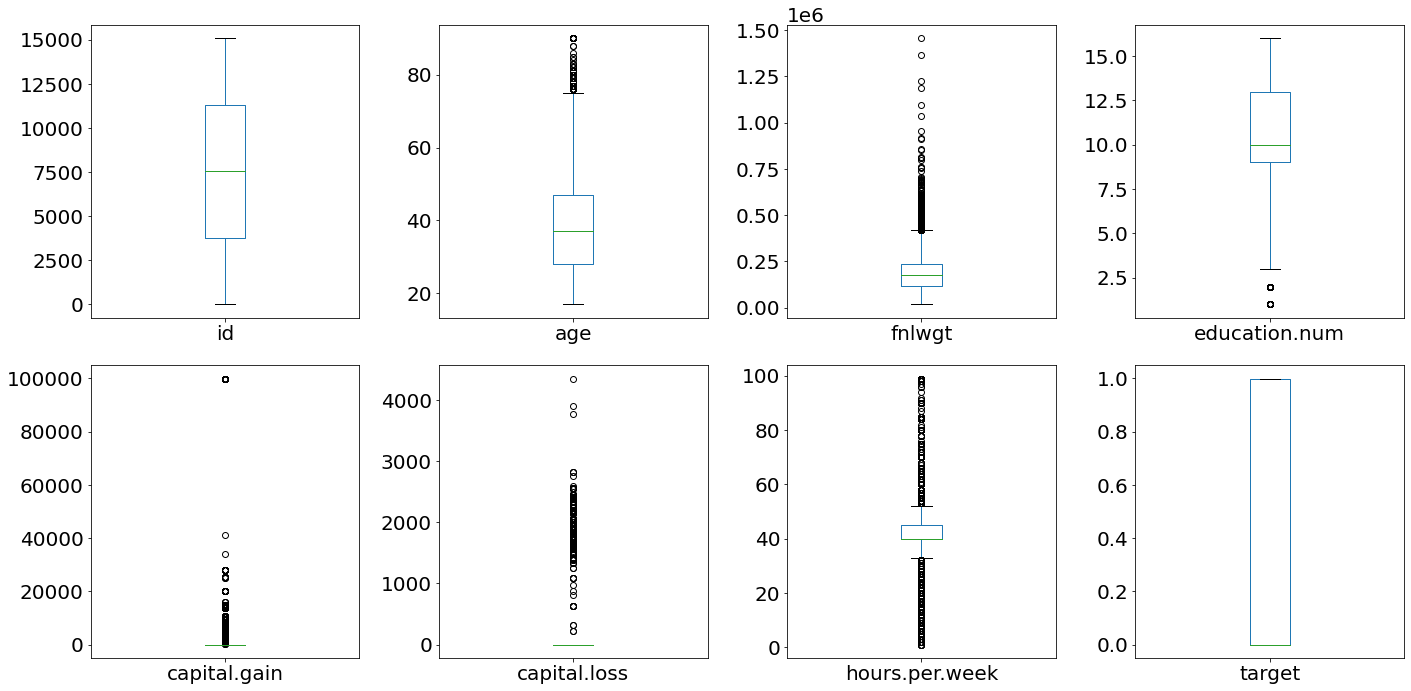

In [9]:
#수치형 변수
numcol=train.describe().columns

train[numcol].plot(kind='box',subplots=True,layout=(2,len(numcol)//2),figsize=(20,10))
plt.tight_layout()
plt.show()

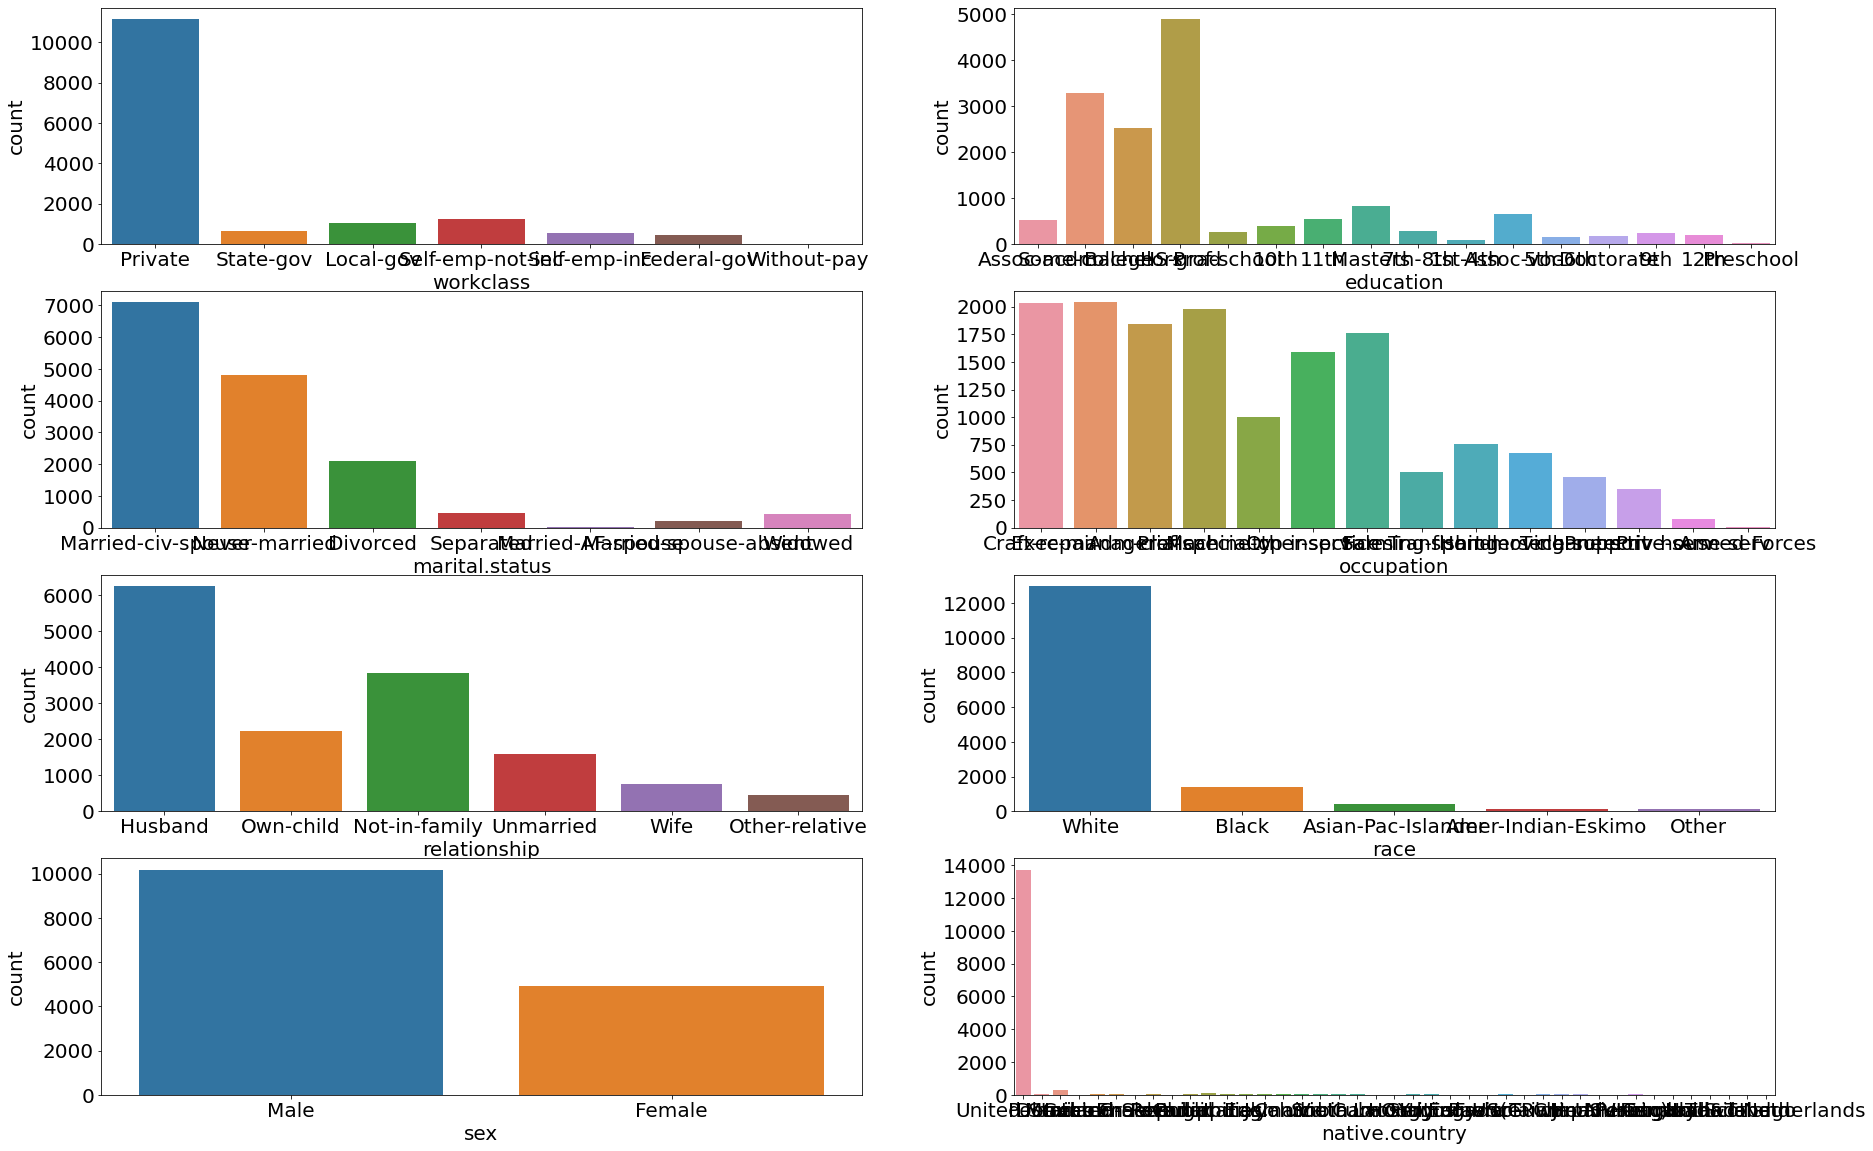

In [10]:
#명목형 변수
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8))=plt.subplots(4,2)
fig.set_size_inches(30,20)

def countplot(x,ax):
    sns.countplot(x=x,data=train,ax=ax)
plt.rc('font',size=10)   
countplot('workclass',ax1)
countplot('education',ax2)
countplot('marital.status',ax3)
countplot('occupation',ax4)
countplot('relationship',ax5)
countplot('race',ax6)
countplot('sex',ax7)
countplot('native.country',ax8)

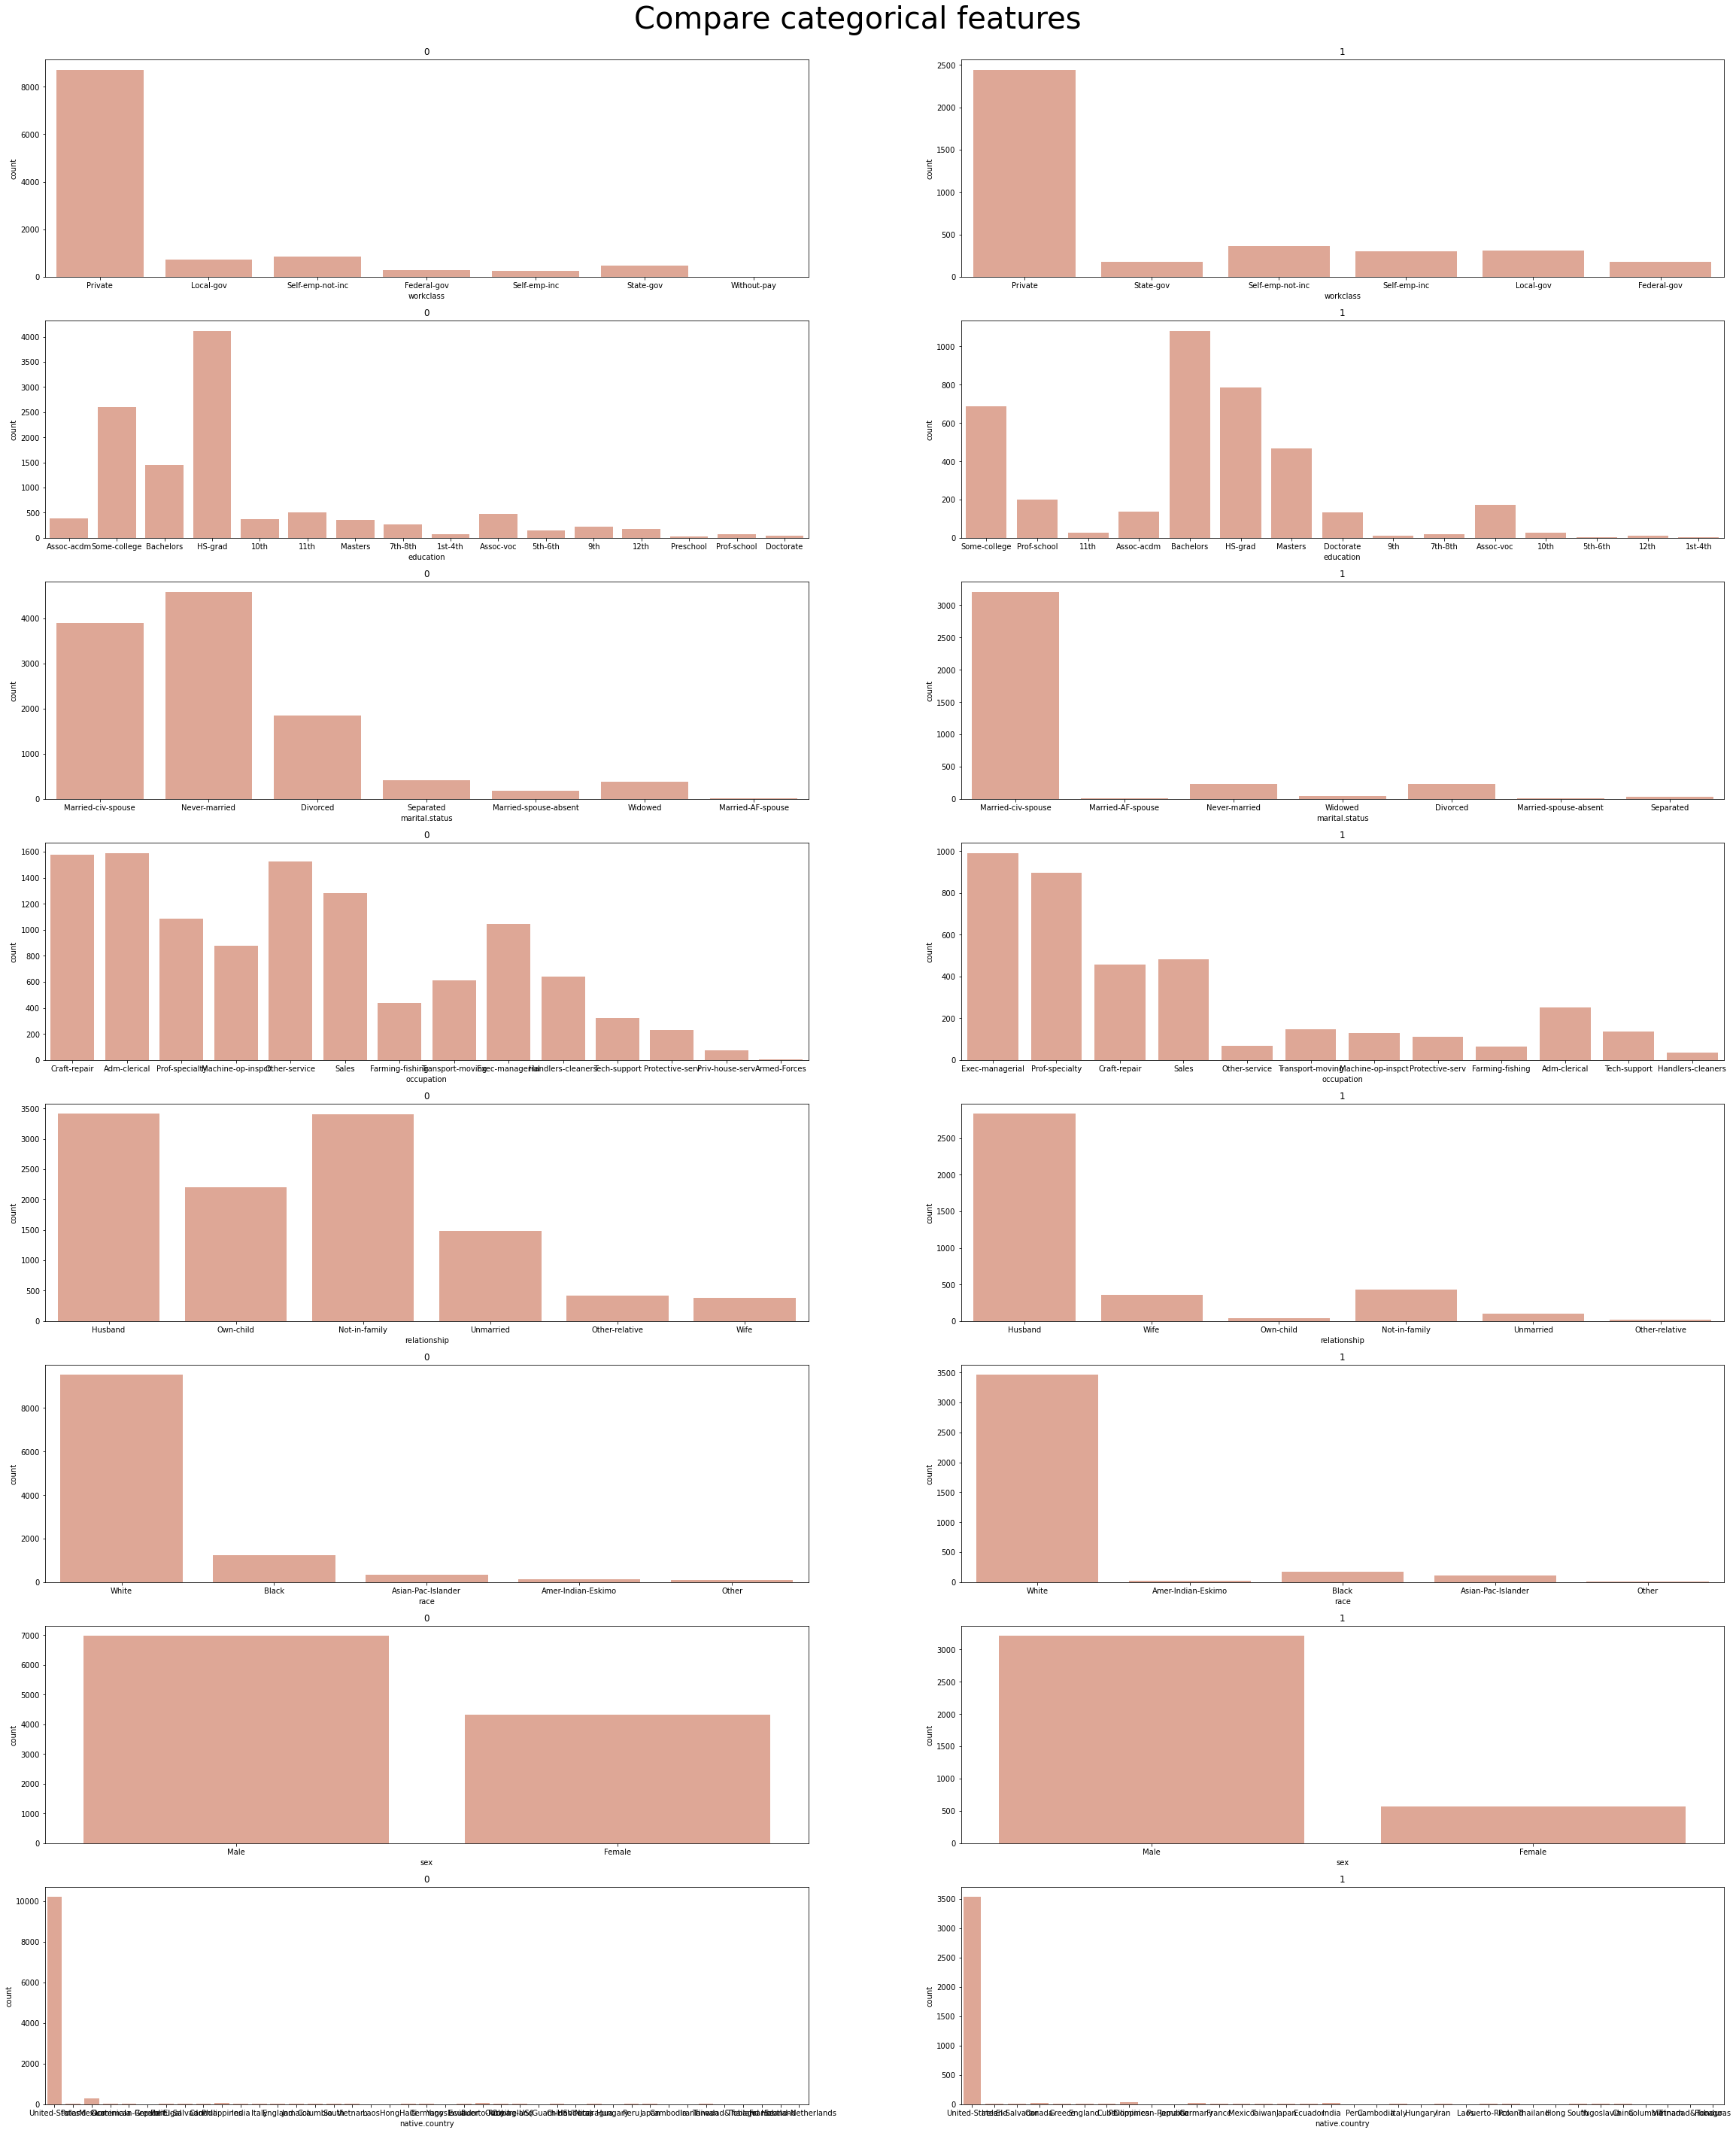

In [11]:
#소득 별 범주형 변수들의 차이
train_categori=train.drop(['id','age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week'],axis=1)


def visualize(axx,field,num):
    sns.countplot(train_categori.columns[num],data=train_categori[train_categori['target']==field],color='#eaa18a',ax=axx)
    axx.set_title(field)
    
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16))=plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(40,50)
fig.suptitle('Compare categorical features',fontsize=40,y=0.9)

k=0
j=1
while k<8:
    for i in range(0,2):
        visualize(eval(f'ax{j}'),train_categori['target'].unique()[i],k)
        j=j+1
    k=k+1

소득이 5만 달러 이상인 사람과 미만인 사람을 비교해 볼 때 결혼 유무의 차이 등에서 그 값이 뚜렷하게 나오는 것을 알 수 있었고 교육 등 여러 변수에서 차이가 있었다.

C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages

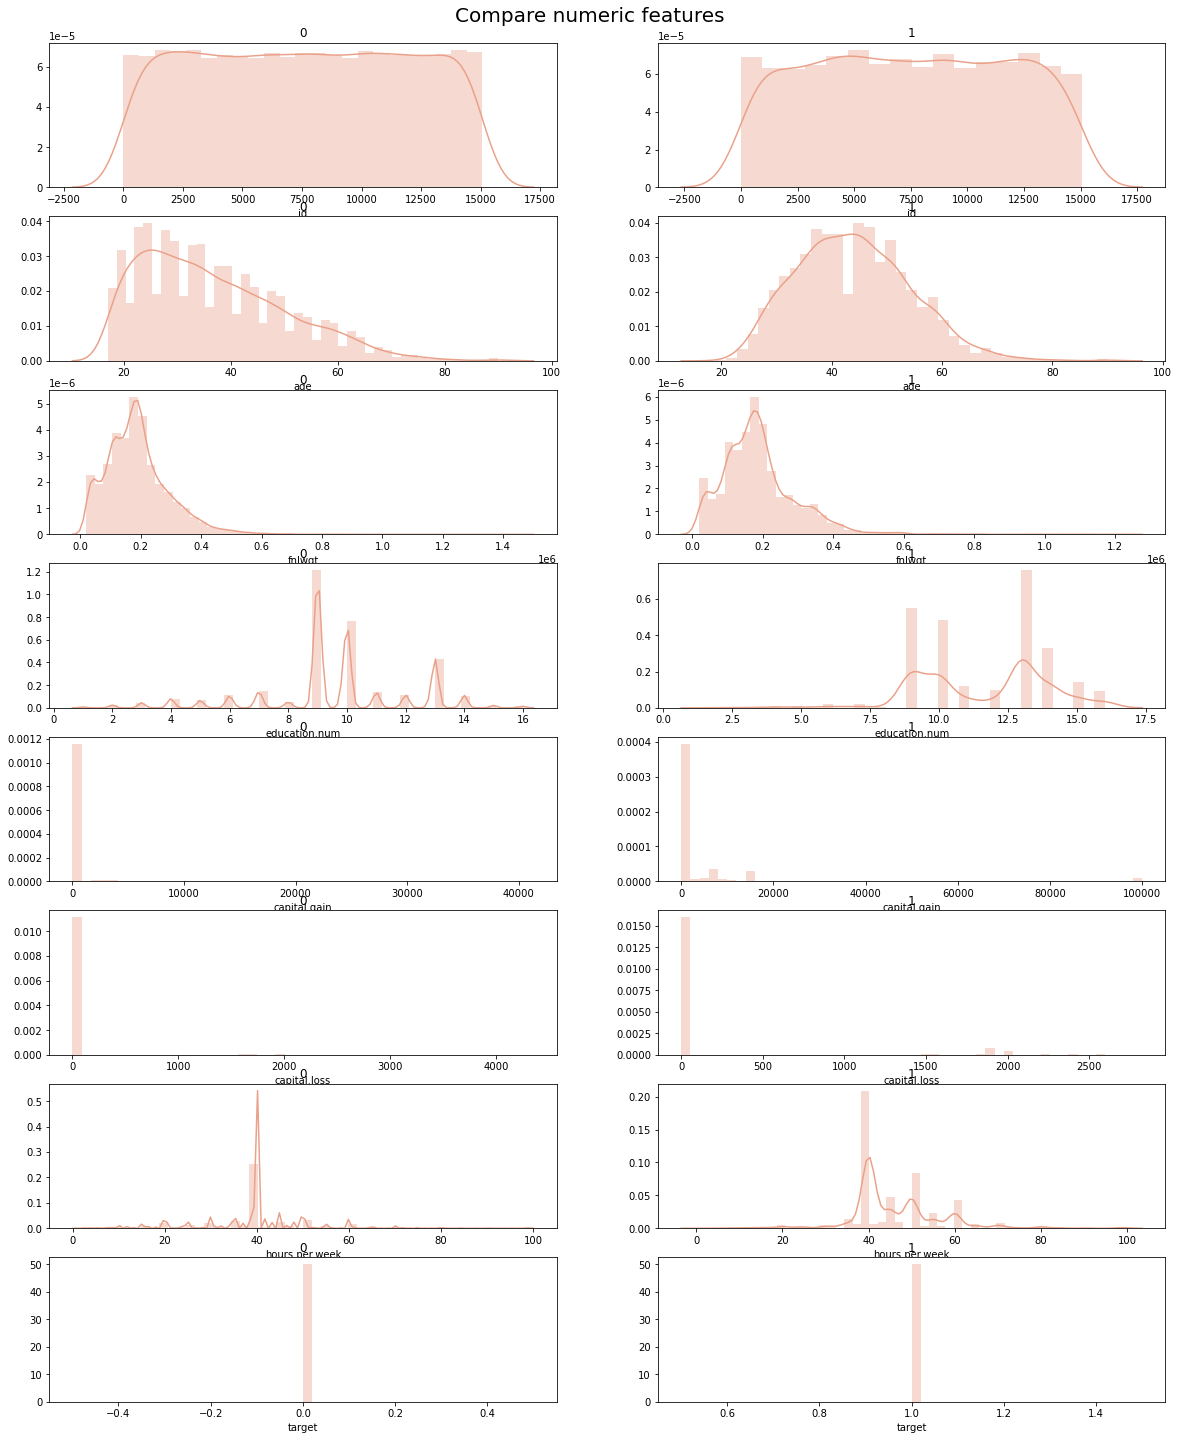

In [12]:
def visualize_line(axx,field,num):
    line=train[numcol][train['target']==field]
    sns.distplot(line[numcol[num]],color='#eaa18a',ax=axx)
    axx.set_title(field)

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16))=plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(20,25)    
fig.suptitle('Compare numeric features',fontsize=20,y=0.9)

k=0
j=1
while(k<8):
    for i in range(0,2):
        visualize_line(eval(f'ax{j}'),i,k)
        j=j+1
    k=k+1

1(5만 달러 이상)과 0(5만 달러 미만)을 비교해 본 결과 1의 범주에서 연령대가 높은 편임을 확인할 수 있었으며 교육 수준이 더 높았고 0의 범주에서 근로시간이 대부분 40시간 전후로 형성되었지만 1의 범주에서는 50시간 이상 근로자도 다수 분포함을 알 수 있었다. 즉, 연령대가 높을 수록 연차가 높은 이유로 소득이 높을 수가 있고 일을 많이 할 수록 소득이 높을 수가 있을 것이다. 

In [13]:
#교육수준 번호의 기준
train[['education','education.num']].drop_duplicates().sort_values(by='education.num').reset_index(drop=True)

,education,education.num
0,Preschool,1
1,1st-4th,2
2,5th-6th,3
3,7th-8th,4
4,9th,5
5,10th,6
6,11th,7
7,12th,8
8,HS-grad,9
9,Some-college,10


education.num 값이 높을 수록 고학력 범주임을 알 수 있었다.

C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


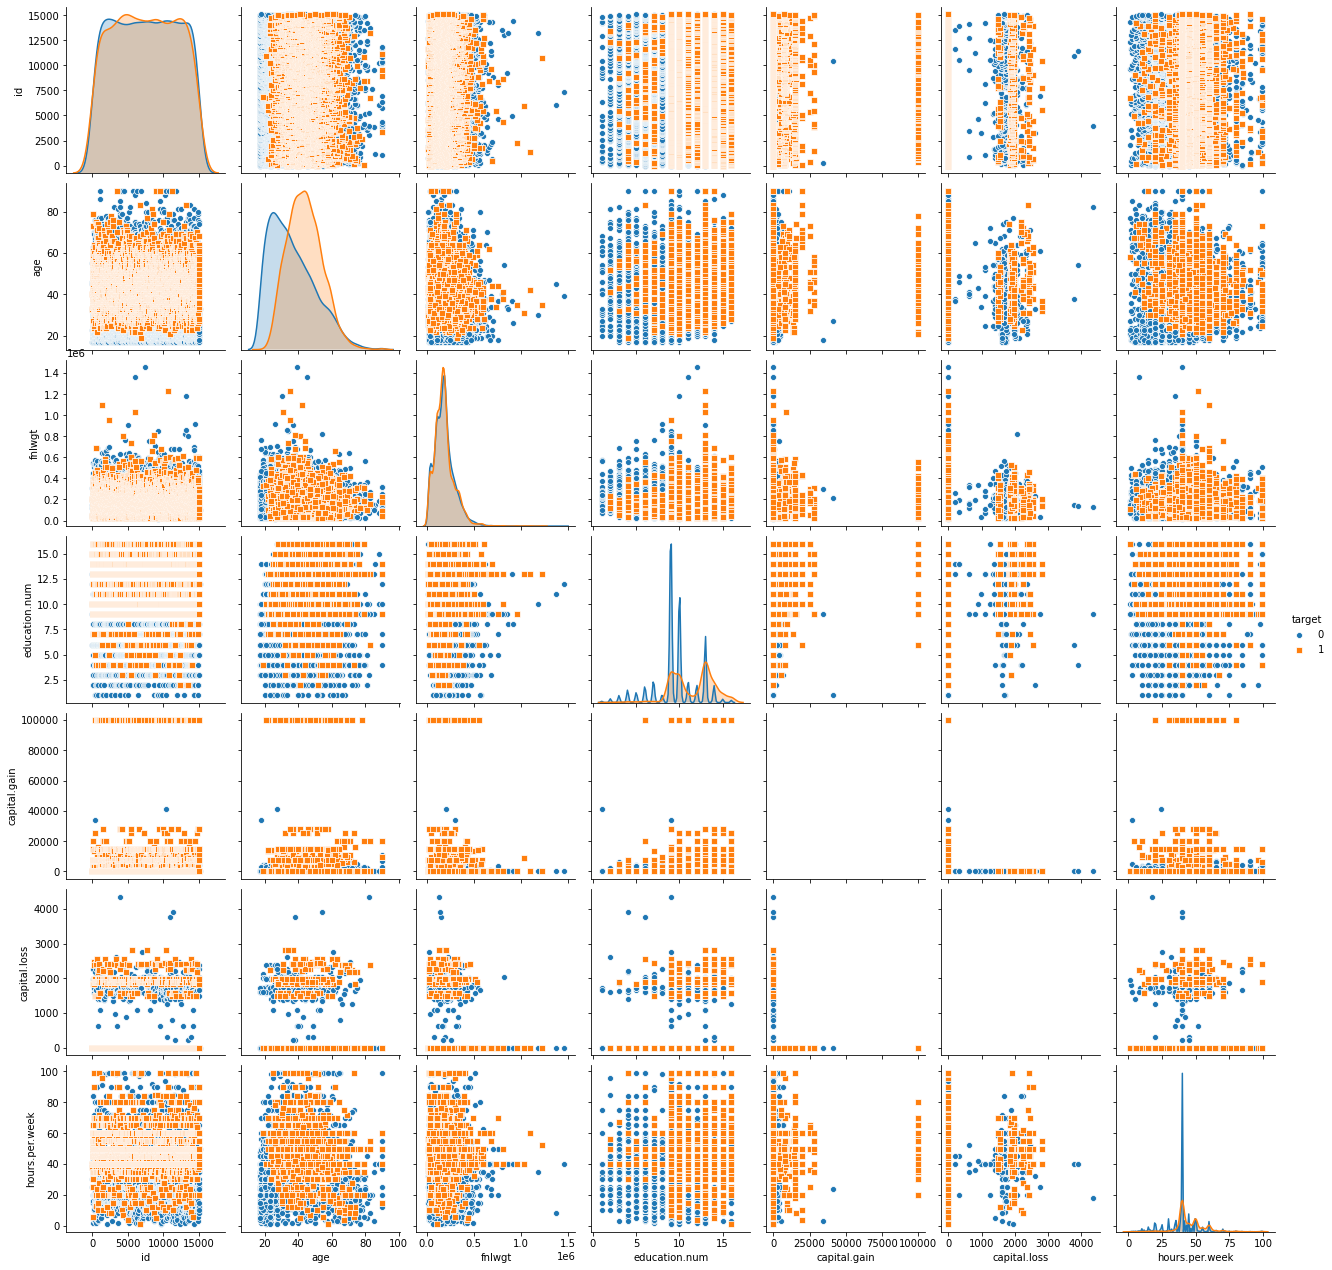

In [14]:
#상관관계
sns.pairplot(train[numcol],hue='target',markers=['o','s'])

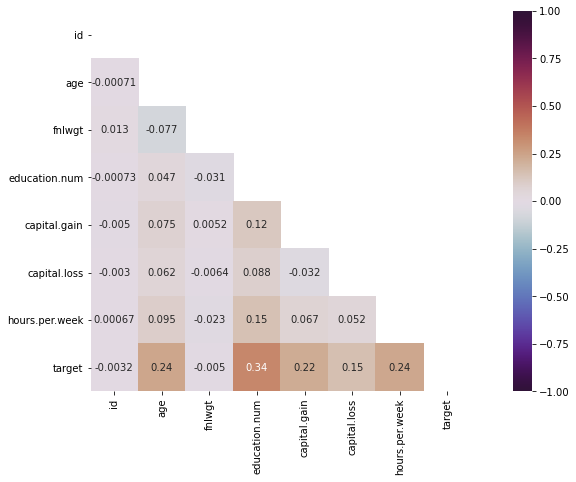

In [15]:
cormat=train[numcol].corr()

mask=np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15,7))
sns.heatmap(cormat,vmax=1,vmin=-1,annot=True,cmap='twilight_shifted',square=True,mask=mask)

숫자형 변수간 상관성은 있어 보이지는 않았다. 그나마 target변수와 상관관계를 가지는 변수는 age,education.num,capital.gain,hours.per.week 변수로 학력이 높을 수록, 나이가 있고 일을 많이 할 수록 고소득자(5만 달러 이상)이다. 또한 target별로 산점도행렬을 보았을 때 고소득 집단이 연령,교육 수준,자본 이익,주당 근무 시간에서 다른 집단보다 높았다. 처음에 통계표를 보고 capital.gain이 99999값을 결측치로 간주하여 제거하려고 했으나 이들은 모두 고소득 집단에 속해있기 때문에 '자본 이익이 10만 달러 이상일 가능성도 있지 않을까?'라는 생각을 하게 되었고 따로 처리하지는 않았습니다.

In [16]:
for i in train_categori.columns[:-1]:
    print("\n")
    print(f'target별 {i}의 빈도')
    display(train_categori.pivot_table(index=i,columns='target',aggfunc='size'))



target별 workclass의 빈도


target,0,1
workclass,,
Federal-gov,291.0,177.0
Local-gov,718.0,309.0
Private,8713.0,2445.0
Self-emp-inc,251.0,301.0
Self-emp-not-inc,867.0,363.0
State-gov,462.0,178.0
Without-pay,6.0,NaN




target별 education의 빈도


target,0,1
education,,
10th,370.0,27.0
11th,508.0,29.0
12th,183.0,10.0
1st-4th,76.0,3.0
5th-6th,147.0,5.0
7th-8th,271.0,18.0
9th,223.0,12.0
Assoc-acdm,390.0,139.0
Assoc-voc,476.0,173.0




target별 marital.status의 빈도


target,0,1
marital.status,,
Divorced,1850,236
Married-AF-spouse,7,5
Married-civ-spouse,3885,3207
Married-spouse-absent,183,16
Never-married,4582,232
Separated,420,34
Widowed,381,43




target별 occupation의 빈도


target,0,1
occupation,,
Adm-clerical,1591.0,253.0
Armed-Forces,3.0,NaN
Craft-repair,1576.0,456.0
Exec-managerial,1047.0,992.0
Farming-fishing,438.0,65.0
Handlers-cleaners,639.0,36.0
Machine-op-inspct,876.0,128.0
Other-service,1527.0,67.0
Priv-house-serv,77.0,NaN




target별 relationship의 빈도


target,0,1
relationship,,
Husband,3409,2833
Not-in-family,3407,429
Other-relative,422,19
Own-child,2197,35
Unmarried,1486,102
Wife,387,355




target별 race의 빈도


target,0,1
race,,
Amer-Indian-Eskimo,118,22
Asian-Pac-Islander,334,108
Black,1223,172
Other,112,11
White,9521,3460




target별 sex의 빈도


target,0,1
sex,,
Female,4336,565
Male,6972,3208




target별 native.country의 빈도


target,0,1
native.country,,
Cambodia,7.0,3.0
Canada,30.0,19.0
China,25.0,8.0
Columbia,33.0,1.0
Cuba,33.0,13.0
Dominican-Republic,34.0,1.0
Ecuador,14.0,4.0
El-Salvador,45.0,7.0
England,28.0,14.0


이원빈도표는 다음과 같이 나타났고 여기서 결혼 유무에 따라, 직업에 따라, 인종, 성별에 따라 소득 분류가 차이가 있는지에 대하여 가설을 설정하기로 하였습니다.

가설 설정
#1.성별에 따라 소득집단 분류에 영향을 줄 것이다.
#2.연령이 소득집단 분류에 영향을 줄 것이다.
#3.학력이 소득집단 분류에 영향을 줄 것이다.
#4.직업에 따라 소득집단 분류에 영향을 줄 것이다.
#5.주당 근무 시간이 소득집단 분류에 영향을 줄 것이다.
#6.결혼 여부에 따라 소득집단 분류에 영향을 줄 것이다.
#7.인종에 따라 소득집단 분류에 영향을 줄 것이다.
#8.자본 이익이 소득집단 분류에 영향을 줄 것이다.


-가설에 대한 분석들은 모두 로지스틱회귀분석을 사용할 예정입니다.

In [17]:
#오류로 인해 변수명을 조금 수정하였습니다. 
train2=train.copy()
train2=train2.rename(columns={'hours.per.week':'hours_per_week','marital.status':'marital_status','capital.gain':'capital_gain'})

In [18]:
import statsmodels.api as sm

def Logistic(x):
    model=sm.Logit.from_formula(f'target~{x}',train2).fit()
    print('#############################')
    print(f'{x}에 따른 target의 odds')
    print('#############################')
    display(model.summary())
    print(np.round(np.exp(model.params),2))
    print('\n')

#1.성별
Logistic('sex')

#2.연령
Logistic('age')

#3.학력
Logistic('education')

#4.직업
Logistic('occupation')

#5.주당 근무시간
Logistic('hours_per_week')

#6.결혼 상태
Logistic('marital_status')

#7.인종
Logistic('race')

#8.자본 이익
Logistic('capital_gain')

Optimization terminated successfully.
         Current function value: 0.536788
         Iterations 6
#############################
sex에 따른 target의 odds
#############################


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                15081
Model:                          Logit   Df Residuals:                    15079
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                 0.04577
Time:                        14:34:09   Log-Likelihood:                -8095.3
converged:                       True   LL-Null:                       -8483.6
Covariance Type:            nonrobust   LLR p-value:                6.623e-171
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.0379      0.045    -45.562      0.000      -2.126      -1.950
sex[T.Male]     1.2616      0.050     25.459      0.000       1.165       1.359
===============================================================================
"""

Intercept      0.13
sex[T.Male]    3.53
dtype: float64


Optimization terminated successfully.
         Current function value: 0.533646
         Iterations 6
#############################
age에 따른 target의 odds
#############################


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                15081
Model:                          Logit   Df Residuals:                    15079
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                 0.05136
Time:                        14:34:09   Log-Likelihood:                -8047.9
converged:                       True   LL-Null:                       -8483.6
Covariance Type:            nonrobust   LLR p-value:                1.639e-191
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7941      0.064    -43.484      0.000      -2.920      -2.668
age            0.0423      0.001     28.729      0.000       0.039       0.045
==============================================================================
"""

Intercept    0.06
age          1.04
dtype: float64


         Current function value: 0.495335
         Iterations: 35
#############################
education에 따른 target의 odds
#############################


C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                15081
Model:                          Logit   Df Residuals:                    15065
Method:                           MLE   Df Model:                           15
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.1195
Time:                        14:34:09   Log-Likelihood:                -7470.1
converged:                      False   LL-Null:                       -8483.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.6177      0.199    -13.131      0.000      -3.008      -2.227
education[T.11th]            -0.2455      0.276     -0.889      0.374      -0.787       0.295
education[T.12th]            -0.2892      0.381     -0.759      0.448      -1.036       0.458
education[T.1st-4th]         -0.6145      0.621     -0.989      0.323      -1.833       0.604
education[T.5th-6th]         -0.7633      0.497     -1.537      0.124      -1.737       0.210
education[T.7th-8th]         -0.0941      0.315     -0.299      0.765      -0.711       0.523
education[T.9th]             -0.3046      0.357     -0.853      0.394      -1.005       0.395
education[T.Assoc-acdm]       1.5860      0.222      7.129      0.000       1.150       2.022
education[T.Assoc-voc]        1.6055      0.218      7.357      0.000       1.178       2.033
education[T.Bachelors]        2.3256      0.203     11.436      0.000       1.927       2.724
education[T.Doctorate]        3.7163      0.265     14.042      0.000       3.198       4.235
education[T.HS-grad]          0.9613      0.203      4.733      0.000       0.563       1.359
education[T.Masters]          2.8884      0.211     13.665      0.000       2.474       3.303
education[T.Preschool]      -18.1886   6592.597     -0.003      0.998   -1.29e+04    1.29e+04
education[T.Prof-school]      3.7113      0.244     15.194      0.000       3.233       4.190
education[T.Some-college]     1.2885      0.204      6.319      0.000       0.889       1.688
=============================================================================================
"""

Intercept                     0.07
education[T.11th]             0.78
education[T.12th]             0.75
education[T.1st-4th]          0.54
education[T.5th-6th]          0.47
education[T.7th-8th]          0.91
education[T.9th]              0.74
education[T.Assoc-acdm]       4.88
education[T.Assoc-voc]        4.98
education[T.Bachelors]       10.23
education[T.Doctorate]       41.11
education[T.HS-grad]          2.61
education[T.Masters]         17.96
education[T.Preschool]        0.00
education[T.Prof-school]     40.91
education[T.Some-college]     3.63
dtype: float64


         Current function value: 0.497356
         Iterations: 35
#############################
occupation에 따른 target의 odds
#############################


C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                15081
Model:                          Logit   Df Residuals:                    15067
Method:                           MLE   Df Model:                           13
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.1159
Time:                        14:34:10   Log-Likelihood:                -7500.6
converged:                      False   LL-Null:                       -8483.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.8387      0.068    -27.166      0.000      -1.971      -1.706
occupation[T.Armed-Forces]        -17.1762   7771.140     -0.002      0.998   -1.52e+04    1.52e+04
occupation[T.Craft-repair]          0.5986      0.086      6.954      0.000       0.430       0.767
occupation[T.Exec-managerial]       1.7848      0.081     22.062      0.000       1.626       1.943
occupation[T.Farming-fishing]      -0.0691      0.149     -0.463      0.643      -0.361       0.223
occupation[T.Handlers-cleaners]    -1.0377      0.184     -5.634      0.000      -1.399      -0.677
occupation[T.Machine-op-inspct]    -0.0846      0.116     -0.727      0.467      -0.313       0.143
occupation[T.Other-service]        -1.2876      0.142     -9.068      0.000      -1.566      -1.009
occupation[T.Priv-house-serv]     -28.0672   3.55e+05   -7.9e-05      1.000   -6.97e+05    6.97e+05
occupation[T.Prof-specialty]        1.6435      0.081     20.203      0.000       1.484       1.803
occupation[T.Protective-serv]       1.1062      0.133      8.291      0.000       0.845       1.368
occupation[T.Sales]                 0.8641      0.086     10.023      0.000       0.695       1.033
occupation[T.Tech-support]          0.9842      0.122      8.039      0.000       0.744       1.224
occupation[T.Transport-moving]      0.4276      0.114      3.760      0.000       0.205       0.650
===================================================================================================
"""

Intercept                          0.16
occupation[T.Armed-Forces]         0.00
occupation[T.Craft-repair]         1.82
occupation[T.Exec-managerial]      5.96
occupation[T.Farming-fishing]      0.93
occupation[T.Handlers-cleaners]    0.35
occupation[T.Machine-op-inspct]    0.92
occupation[T.Other-service]        0.28
occupation[T.Priv-house-serv]      0.00
occupation[T.Prof-specialty]       5.17
occupation[T.Protective-serv]      3.02
occupation[T.Sales]                2.37
occupation[T.Tech-support]         2.68
occupation[T.Transport-moving]     1.53
dtype: float64


Optimization terminated successfully.
         Current function value: 0.533779
         Iterations 6
#############################
hours_per_week에 따른 target의 odds
#############################


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                15081
Model:                          Logit   Df Residuals:                    15079
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                 0.05112
Time:                        14:34:10   Log-Likelihood:                -8049.9
converged:                       True   LL-Null:                       -8483.6
Covariance Type:            nonrobust   LLR p-value:                1.220e-190
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.1558      0.079    -39.772      0.000      -3.311      -3.000
hours_per_week     0.0485      0.002     27.426      0.000       0.045       0.052
==================================================================================
"""

Intercept         0.04
hours_per_week    1.05
dtype: float64


Optimization terminated successfully.
         Current function value: 0.455765
         Iterations 7
#############################
marital_status에 따른 target의 odds
#############################


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                15081
Model:                          Logit   Df Residuals:                    15074
Method:                           MLE   Df Model:                            6
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                  0.1898
Time:                        14:34:10   Log-Likelihood:                -6873.4
converged:                       True   LL-Null:                       -8483.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -2.0591      0.069    -29.790      0.000      -2.195      -1.924
marital_status[T.Married-AF-spouse]         1.7226      0.590      2.922      0.003       0.567       2.878
marital_status[T.Married-civ-spouse]        1.8673      0.073     25.537      0.000       1.724       2.011
marital_status[T.Married-spouse-absent]    -0.3778      0.270     -1.401      0.161      -0.906       0.151
marital_status[T.Never-married]            -0.9240      0.096     -9.579      0.000      -1.113      -0.735
marital_status[T.Separated]                -0.4548      0.191     -2.378      0.017      -0.830      -0.080
marital_status[T.Widowed]                  -0.1225      0.175     -0.700      0.484      -0.466       0.221
===========================================================================================================
"""

Intercept                                  0.13
marital_status[T.Married-AF-spouse]        5.60
marital_status[T.Married-civ-spouse]       6.47
marital_status[T.Married-spouse-absent]    0.69
marital_status[T.Never-married]            0.40
marital_status[T.Separated]                0.63
marital_status[T.Widowed]                  0.88
dtype: float64


Optimization terminated successfully.
         Current function value: 0.556390
         Iterations 6
#############################
race에 따른 target의 odds
#############################


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                15081
Model:                          Logit   Df Residuals:                    15076
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                 0.01092
Time:                        14:34:10   Log-Likelihood:                -8390.9
converged:                       True   LL-Null:                       -8483.6
Covariance Type:            nonrobust   LLR p-value:                 5.272e-39
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.6796      0.232     -7.233      0.000      -2.135      -1.224
race[T.Asian-Pac-Islander]     0.5506      0.257      2.140      0.032       0.046       1.055
race[T.Black]                 -0.2819      0.246     -1.146      0.252      -0.764       0.200
race[T.Other]                 -0.6410      0.392     -1.635      0.102      -1.410       0.128
race[T.White]                  0.6674      0.233      2.864      0.004       0.211       1.124
==============================================================================================
"""

Intercept                     0.19
race[T.Asian-Pac-Islander]    1.73
race[T.Black]                 0.75
race[T.Other]                 0.53
race[T.White]                 1.95
dtype: float64


Optimization terminated successfully.
         Current function value: 0.510323
         Iterations 8
#############################
capital_gain에 따른 target의 odds
#############################


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                15081
Model:                          Logit   Df Residuals:                    15079
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Apr 2022   Pseudo R-squ.:                 0.09282
Time:                        14:34:11   Log-Likelihood:                -7696.2
converged:                       True   LL-Null:                       -8483.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.3245      0.021    -64.064      0.000      -1.365      -1.284
capital_gain     0.0003   1.26e-05     26.447      0.000       0.000       0.000
================================================================================
"""

Intercept       0.27
capital_gain    1.00
dtype: float64




ML 전처리

※위의 결과를 참고하여 가중치를 두어 인코딩을 하였고 나머지 object변수는 가변수화

1.education.num변수의 경우 odds 결과에 따라 값을 5,3,2,1로 변환하였음(Doctorate,Prof-school=5 Masters,Bachelors=3 Assoc-acdm,Assoc-voc,Some-college=2 나머지 1)

2.직업 변수의 경우 odds 결과에 따라 값을 3,2,1로 변환하였음(Exec-managerial,Prof-specialty=3 Protective-serv,Tech-support,Sales=2 나머지 1)

3.결혼 상태 변수의 경우 odds 결과에 따라 값을 3,1로 변환하였음(Married-civ-spouse,Married-AF-spouse=3 나머지 1)

4.성별의 경우 남성은 2, 여성은 1

-나머지 object변수들은 dummy 변수로 인코딩

In [16]:
def edu_encoding(x):
    div=''
    if x=='Doctorate' or x=='Prof-school':
        div=5
    elif x=='Masters' or x=='Bachelors':
        div=3
    elif x=='Assoc-acdm' or x=='Assoc-voc' or x=='Some-college':
        div=2
    else:
        div=1
    return div

def ocu_encoding(x):
    div=''
    if x=='Exec-managerial' or x=='Prof-specialty':
        div=3
    elif x=='Protective-serv' or x=='Tech-support' or x=='Sales':
        div=2
    else:
        div=1
    return div

def mry_encoding(x):
    div=''
    if x=='Married-civ-spouse' or x=='Married-AF-spouse':
        div=3
    else:
        div=1
    return div

def sex_encoding(x):
    div=''
    if x=='Male':
        div=2
    else:
        div=1
    return div

def digit_encoder(data):
    data['education']=data['education'].apply(lambda x: edu_encoding(x))
    data['occupation']=data['occupation'].apply(lambda x: ocu_encoding(x))
    data['marital.status']=data['marital.status'].apply(lambda x: mry_encoding(x))
    data['sex']=data['sex'].apply(lambda x: sex_encoding(x))
    return data
data=pd.concat([train,test],axis=0)
data=digit_encoder(data)
data.drop(['id','fnlwgt','education.num','capital.gain','capital.loss'],axis=1,inplace=True)
data=pd.get_dummies(data)

In [17]:

#레이블 인코더
#def make_label_map(dataframe):
#    label_maps={}
#    for col in dataframe.columns:
#        if dataframe[col].dtype=='object':
#            label_map={'unknown':0}
#            for i,key in enumerate(dataframe[col].unique()):
#                label_map[key]=i
#            label_maps[col]=label_map
#    return label_maps
#
#def label_encoder(dataframe,label_map):
#    for col in dataframe.columns:
#        if dataframe[col].dtype=='object':
#            dataframe[col]=dataframe[col].map(label_map[col])
#    return dataframe



#나머지 object변수는 가변수로 변환
train=data[:len(train)]
test=data[len(train):].drop('target',axis=1)

ML Modeling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

y=train['target']
X=train.drop('target',axis=1)
accuracy=[]
models=[RandomForestClassifier,LogisticRegression,SVC,KNeighborsClassifier,LGBMClassifier,XGBClassifier]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=156)
for i in models:
    clf=i()
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred))
    
algorism=['lr_clf','rf_clf','KNN','svc','xgb_clf','lgbm_clf']

for i in algorism:
    if i=='lr_clf':
        lr_clf=LogisticRegression()
    elif i=='rf_clf':
        rf_clf=RandomForestClassifier()
    elif i=='KNN':
        knn_clf=KNeighborsClassifier()
    elif i=='svc':
        svc=SVC(kernel='linear',probability=True)
    elif i=='xgb_clf':
        xgb_clf=XGBClassifier()
    else:
        lgbm_clf=LGBMClassifier()
vot_model=VotingClassifier(estimators=[('LogisticRegression',lr_clf),('RandomForest',rf_clf),('SVC',svc),('KNN',knn_clf),('LGBoost',lgbm_clf),('XGBoost',xgb_clf)],voting='soft')
vot_model.fit(X_train,y_train)
pred2=vot_model.predict(X_test)
accuracy.append(accuracy_score(y_test,pred2))

accu_data=pd.DataFrame(accuracy,index=['RandomForestClassifier','LogisticRegression','SVC','KNeighborsClassifier','LGBMClassifier','XGBClassifier','Voting'],columns=['Accuracy'])

C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jeong SeungJu\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:38] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
accu_data=accu_data.reset_index()

,level_0,index,Accuracy
4,4,LGBMClassifier,0.832486
6,6,Voting,0.831381
5,5,XGBClassifier,0.826961
1,1,LogisticRegression,0.825635
2,2,SVC,0.823867
0,0,RandomForestClassifier,0.807735
3,3,KNeighborsClassifier,0.803978


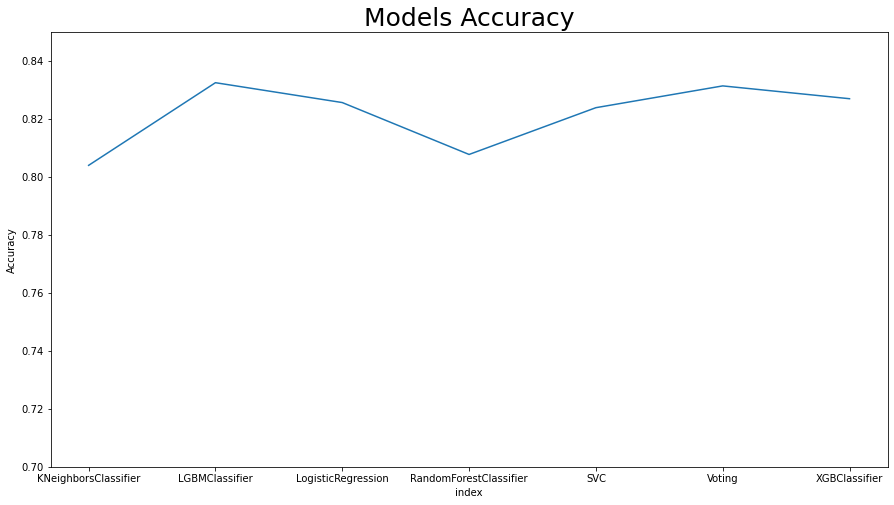

In [32]:
plt.figure(figsize=(15,8))
plt.ylim(0.7,0.85)
plt.title("Models Accuracy",size=25)
sns.lineplot(x='index',y='Accuracy',data=accu_data)
display(accu_data.sort_values(by='Accuracy',ascending=False))

LGBM모델의 정확도가 가장 높기 때문에 LGBM모델을 이용하여 test의 target값 예측

In [24]:
lgbm_clf.fit(X,y)
pred=lgbm_clf.predict(test)
submit=pd.read_csv(directory+'sample_submission.csv')
submit['target']=pred
submit.to_csv('sample_submission.csv',index=False)